In [35]:
import os
import yaml
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [36]:
# Cargar configuración
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

data_path = config["paths"]["prepared_data"]
img_height = config["image_size"]["height"]
img_width = config["image_size"]["width"]
batch_size = config["training"]["batch_size"]

Found 540 images belonging to 54 classes.


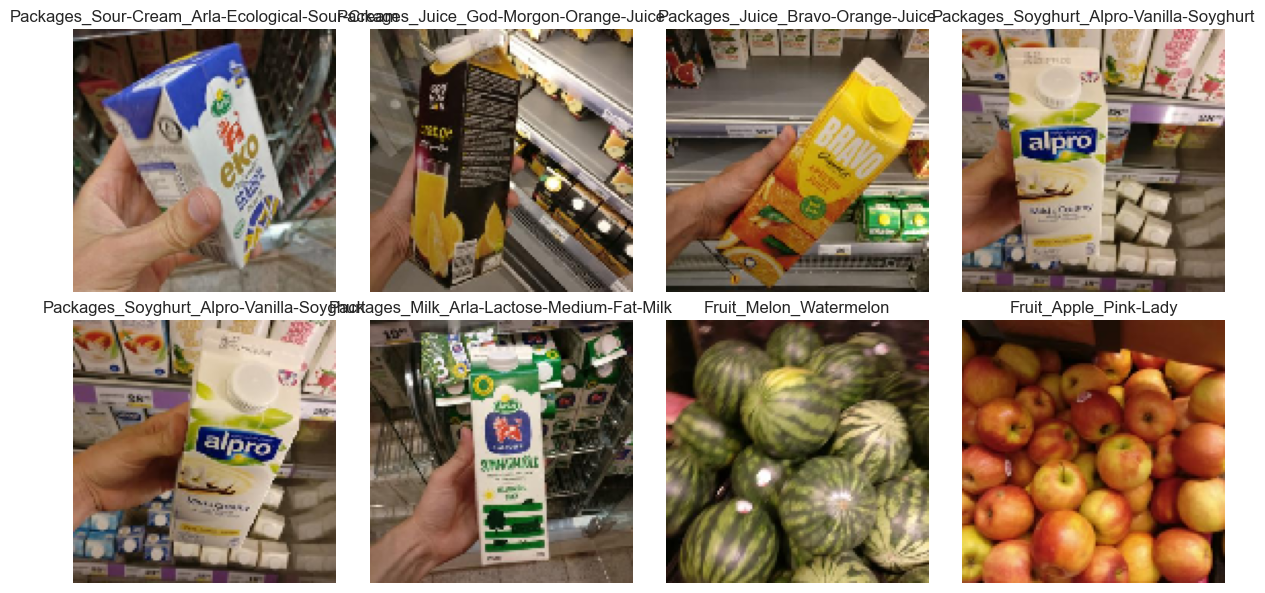

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, "train"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

# Visualizar algunas imágenes
class_names = list(train_generator.class_indices.keys())
images, labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()

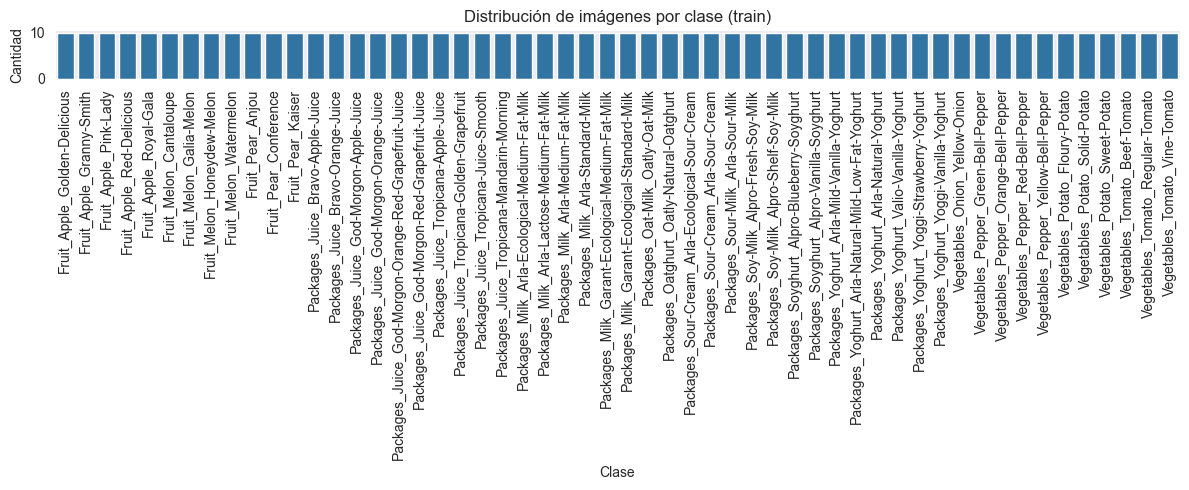

In [38]:
from collections import Counter

class_counts = Counter(train_generator.classes)
sorted_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(12, 5))
sns.barplot(x=[class_names[k] for k in sorted_counts.keys()],
            y=list(sorted_counts.values()))
plt.xticks(rotation=90)
plt.title("Distribución de imágenes por clase (train)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

In [39]:
# Cargar set de validación
val_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, "val"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

# Comprobar que las clases coincidan
assert train_generator.class_indices == val_generator.class_indices
print("✅ Las clases del conjunto de entrenamiento y validación son consistentes.")

Found 355 images belonging to 54 classes.
✅ Las clases del conjunto de entrenamiento y validación son consistentes.


In [40]:
# ✍️ Reflexión: ¿hay clases poco representadas? ¿se requiere balanceo?